In [101]:
import pandas as pd
import numpy as np

In [102]:
df = pd.read_csv('salaries.csv')

In [103]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [104]:
inputs = df.drop(['salary_more_then_100k'], axis =1)
target = df['salary_more_then_100k']

In [105]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [108]:
inputs['le_company'] = le_company.fit_transform(inputs['company'])
inputs['le_job'] = le_job.fit_transform(inputs['job'])
inputs['le_degree'] = le_degree.fit_transform(inputs['degree'])

In [109]:
inputs.drop(['company','job','degree'], axis = 1, inplace =True)

In [110]:
inputs.head()

,le_company,le_job,le_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [111]:
from sklearn import tree

In [112]:
model = tree.DecisionTreeClassifier()

In [113]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [114]:
model.predict([[2,0,0]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [115]:
model.score(inputs, target)

1.0

## POST PRUNNING FOR SMALLER DATASET

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
from sklearn.datasets import load_iris

In [118]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [119]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [120]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [121]:
df['species'] = iris.target

In [122]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
x = df.iloc[:,0:4]
y=df.species

In [124]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [125]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.33, random_state = 42)

In [126]:
x_train.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
## Post Prunning technique
treemodel = DecisionTreeClassifier()

In [129]:
treemodel.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

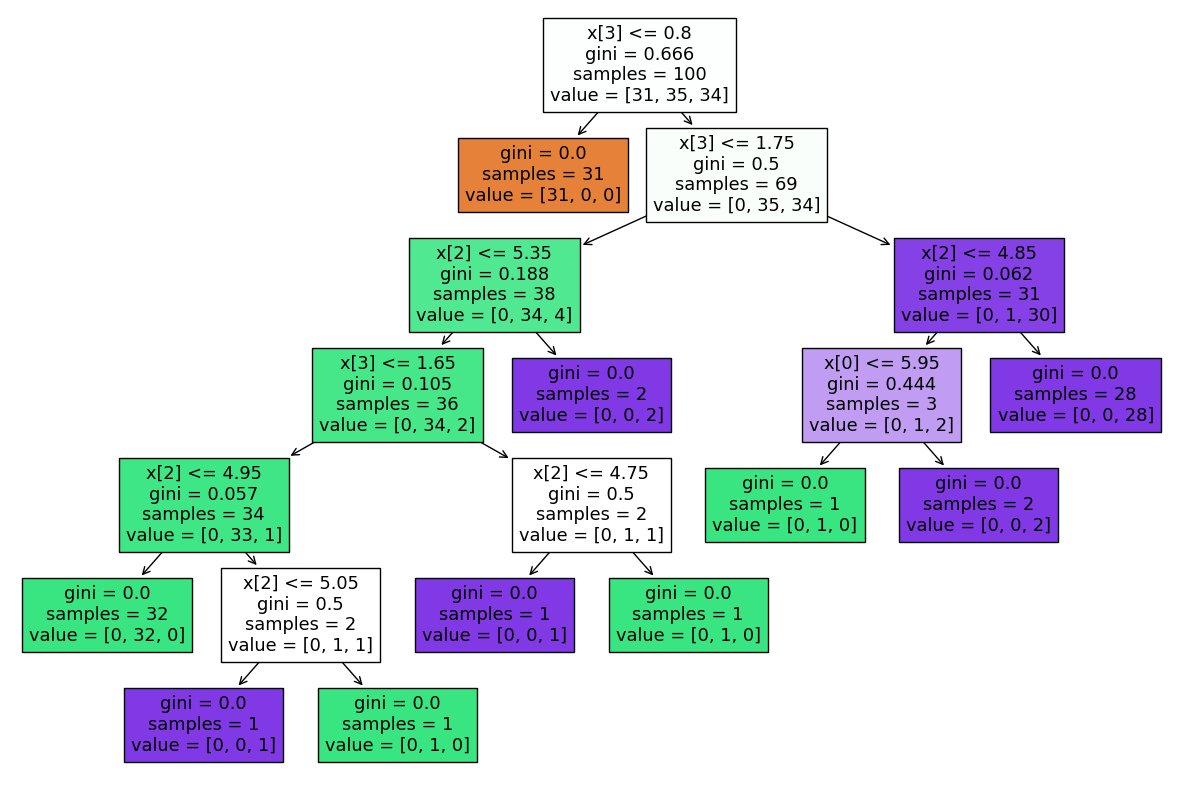

In [130]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel, filled = True)

If x[2] i.e. 'petal length (cm)' <=2.45 then it is sentosa

In [131]:
y_train[x_train['petal length (cm)']<=2.45].unique()

array([0])

In [132]:
tree_model = DecisionTreeClassifier(max_depth=2)

In [133]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

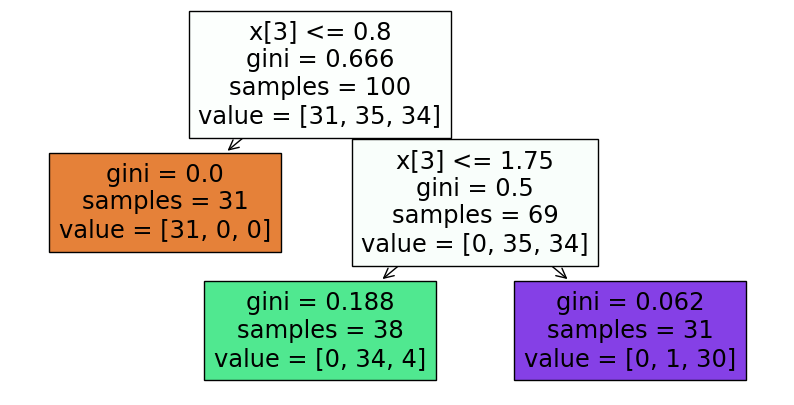

In [134]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(tree_model, filled = True)

In [135]:
y_pred = tree_model.predict(x_test)

In [136]:
from sklearn.metrics import accuracy_score, classification_report

In [137]:
score = accuracy_score(y_pred, y_test)
score

0.98

## Preprunning

In [138]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
trr_mod = DecisionTreeClassifier()
cv = GridSearchCV(trr_mod, param_grid = parameter, cv =5, scoring='accuracy')

In [141]:
cv.fit(x_train, y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [142]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [143]:
y_pred = cv.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [144]:
score = accuracy_score(y_pred, y_test)
score

0.98

In [145]:
trr_mod = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 2,
 max_features= 'auto',
 splitter= 'best')


In [146]:
trr_mod.fit(x_train, y_train)

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=2, max_features='auto')

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.229\nsamples = 38\nvalue = [0, 5, 33]')]

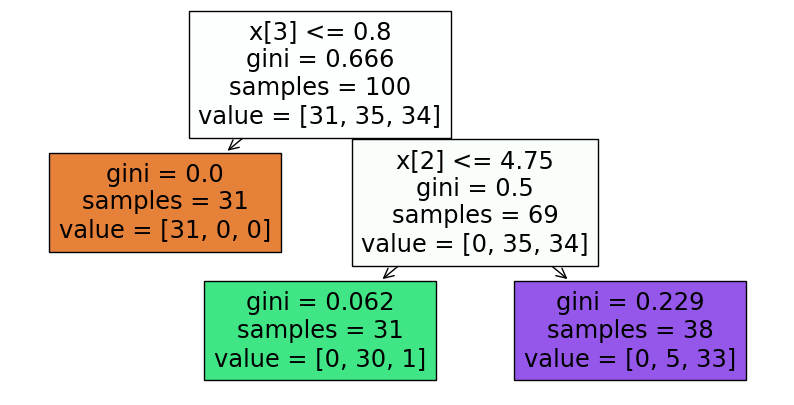

In [147]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(trr_mod, filled = True)

## Practice 2

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('processed.cleveland.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [154]:
df.columns = ['age','sex','cp','restbp','chol', 'fbs','restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal','hd']

In [155]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [157]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [158]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [159]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [160]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [162]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [163]:
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

In [169]:
df.shape

(303, 14)

In [166]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [170]:
df1 = df.loc[(df['ca']!='?') & (df['thal']!='?')]

In [172]:
df1.shape

(297, 14)

In [193]:
df1['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [194]:
df2 = pd.get_dummies(df1, columns = ['cp','restecg','slope','thal'], drop_first = True, dtype = 'int' )
df2.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,hd,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,1,0,0,0,0


In [232]:
x=df2.drop('hd', axis=1)
y=df2.hd
y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

In [233]:
y.unique()

array([0, 1], dtype=int64)

In [234]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state =23)

In [235]:
print(x_train.shape)
print(x_test.shape)

(237, 18)
(60, 18)


In [236]:
y.unique()

array([0, 1], dtype=int64)

In [204]:
y_not_zero_index = y>0
y[y_not_zero_index]=1
y.unique()

C:\Users\Akash Patil\AppData\Local\Temp\ipykernel_14064\4273971348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_index]=1


array([0, 1], dtype=int64)

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
clf_tr = DecisionTreeClassifier(random_state = 42)
clf = clf_tr.fit(x_train,y_train)

In [239]:
clf

DecisionTreeClassifier(random_state=42)

In [240]:
from sklearn import tree

[Text(0.6210106382978723, 0.9285714285714286, 'thal_7.0 <= 0.5\ngini = 0.495\nsamples = 237\nvalue = [130, 107]'),
 Text(0.375, 0.7857142857142857, 'ca <= 0.5\ngini = 0.388\nsamples = 148\nvalue = [109, 39]'),
 Text(0.2074468085106383, 0.6428571428571429, 'age <= 57.5\ngini = 0.211\nsamples = 100\nvalue = [88, 12]'),
 Text(0.10638297872340426, 0.5, 'thal_6.0 <= 0.5\ngini = 0.084\nsamples = 68\nvalue = [65, 3]'),
 Text(0.06382978723404255, 0.35714285714285715, 'restbp <= 109.0\ngini = 0.031\nsamples = 63\nvalue = [62, 1]'),
 Text(0.0425531914893617, 0.21428571428571427, 'restbp <= 106.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.02127659574468085, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06382978723404255, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0851063829787234, 0.21428571428571427, 'gini = 0.0\nsamples = 58\nvalue = [58, 0]'),
 Text(0.14893617021276595, 0.35714285714285715, 'oldpeak <= 1.65\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.1276595744680851, 0

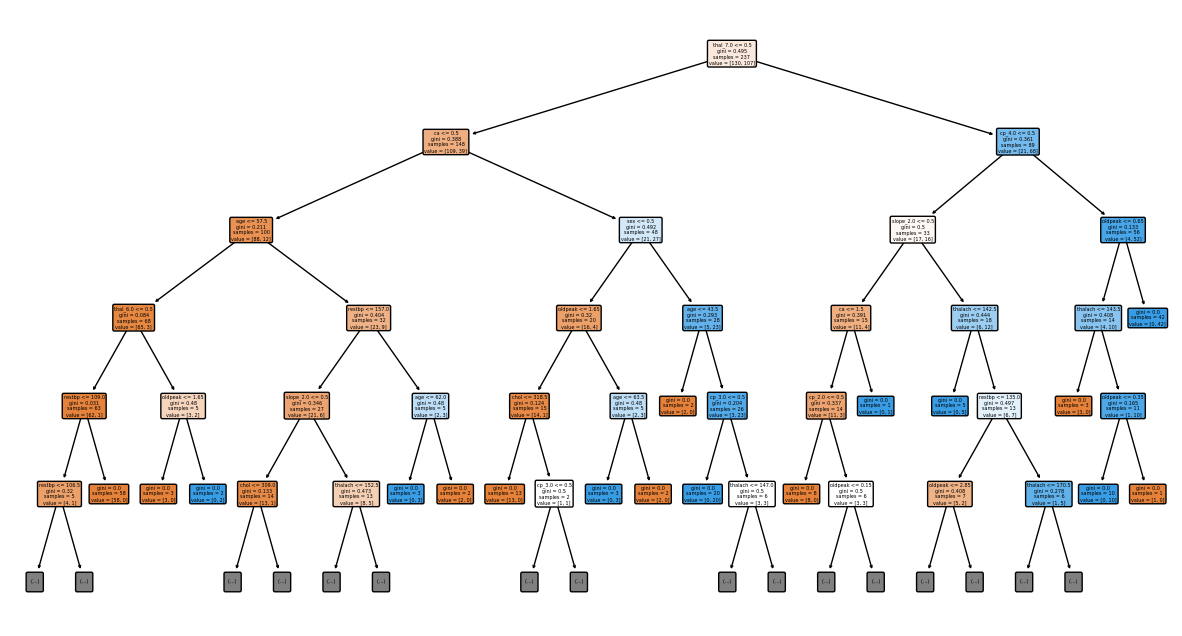

In [241]:
plt.figure(figsize= (15,8))
tree.plot_tree(clf,
         filled= True,
         rounded=True,
         max_depth = 5,
         feature_names=x.columns)

In [242]:
from sklearn.metrics import confusion_matrix


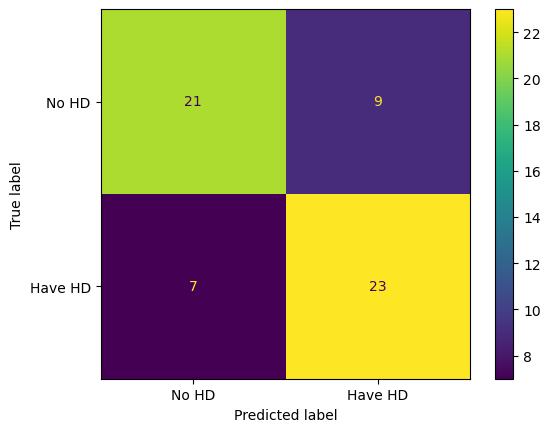

In [246]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels = ["No HD","Have HD"])

In [251]:
x_train.head(3)

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
133,51.0,1.0,140.0,261.0,0.0,186.0,1.0,0.0,0.0,0,0,1,0,1,0,0,0,0
28,43.0,1.0,150.0,247.0,0.0,171.0,0.0,1.5,0.0,0,0,1,0,0,0,0,0,0
157,58.0,1.0,125.0,300.0,0.0,171.0,0.0,0.0,2.0,0,0,1,0,1,0,0,0,1


In [254]:
x_train.shape

(237, 18)

In [255]:
clf.predict([[60,1,124,421,0,179,0,0,2,0,0,1,0,1,0,0,0,1]])

C:\Users\Akash Patil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## COST COMPLEXITY PRUNING

In [257]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00351617, 0.00391802, 0.00393812, 0.00415243,
        0.00502311, 0.00618847, 0.00630902, 0.00703235, 0.00733374,
        0.00760373, 0.00767165, 0.00794734, 0.00956399, 0.01032576,
        0.01104718, 0.01119766, 0.01183627, 0.01226411, 0.03449986,
        0.03801989, 0.05359049, 0.11750267]),
 'impurities': array([0.        , 0.00703235, 0.01486839, 0.02274463, 0.03104949,
        0.0360726 , 0.06082647, 0.09237158, 0.09940392, 0.1140714 ,
        0.12927885, 0.1369505 , 0.15284519, 0.17197318, 0.18229894,
        0.19334612, 0.21574145, 0.23941398, 0.25167808, 0.28617795,
        0.32419784, 0.37778833, 0.495291  ])}

In [261]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
# ignoring the max value of the node which will give us only the root node.

In [262]:
cls_dts = []  # array for decision tree

In [263]:
# we will create one decision tree per aplha value
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train, y_train)
    cls_dts.append(clf_dt)

In [267]:
cls_dts[4]

DecisionTreeClassifier(ccp_alpha=0.00415243453218137, random_state=0)

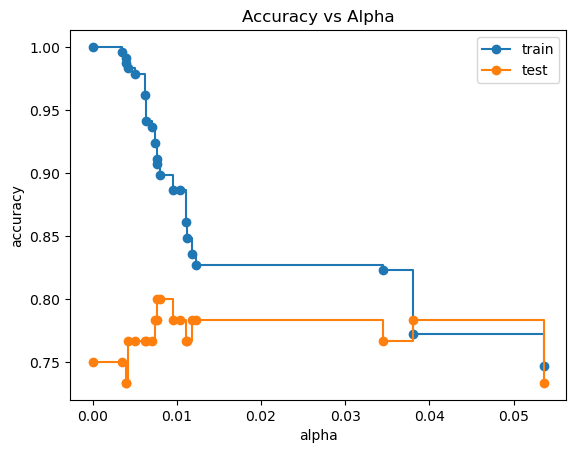

In [285]:
train_score = [cls_dt.score(x_train, y_train) for cls_dt in cls_dts]
test_score = [cls_dt.score(x_test, y_test) for cls_dt in cls_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas, train_score, marker ="o", label = 'train', drawstyle = "steps-post")
ax.plot(ccp_alphas, test_score, marker ="o", label = 'test', drawstyle = "steps-post")
ax.legend()
plt.show()

In [300]:
pd.DataFrame(data = [ccp_alphas, test_score]).transpose()

,0,1
0,0.000000,0.750000
1,0.003516,0.750000
2,0.003918,0.733333
3,0.003938,0.733333
4,0.004152,0.766667
5,0.005023,0.766667
6,0.006188,0.766667
7,0.006309,0.766667
8,0.007032,0.766667
9,0.007334,0.783333


In [301]:
# ccp_alphas =0.007672

In [304]:
from sklearn.model_selection import cross_val_score
cls_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=0.007672)
cls_dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007672, random_state=0)

In [305]:
cls_dt.score(x_test, y_test)

0.8

In [308]:
score = cross_val_score(cls_dt, x_train, y_train, cv=5)
score

array([0.83333333, 0.77083333, 0.68085106, 0.70212766, 0.78723404])

In [307]:
## Our accuracy vary based on the training and testing split. So we perform cross-validation for multiple ccp_alphas values and 
## select the best ccp_aplha values for the mean of the cross-validation

In [309]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])


alpha_result = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

<Axes: xlabel='alpha'>

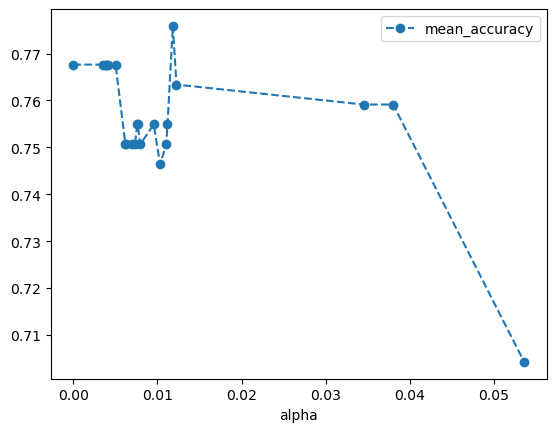

In [320]:
alpha_result.plot(x='alpha', y='mean_accuracy', marker = 'o', linestyle='--')

<Axes: xlabel='alpha'>

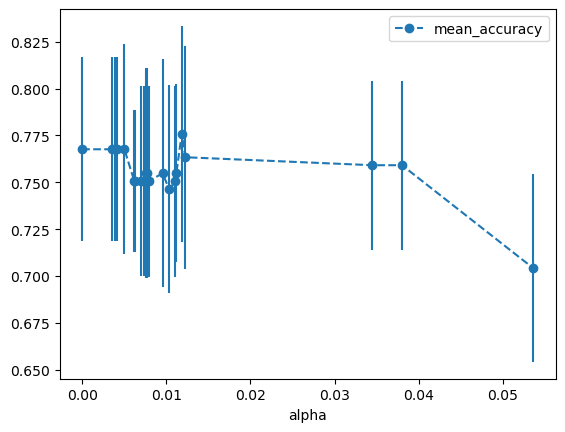

In [314]:
alpha_result.plot(x='alpha', y='mean_accuracy', yerr='std', marker = 'o', linestyle='--')

In [318]:
alpha_result.loc[alpha_result['mean_accuracy']==alpha_result['mean_accuracy'].max()]

,alpha,mean_accuracy,std
17,0.011836,0.775887,0.057594


In [319]:
print(alpha_result['std'].min())
print(alpha_result['std'].max())

0.037833323195921864
0.06084428536036089


In [323]:
ideal_ccp_alpha = 0.011836
ideal_ccp_alpha

0.011836

In [328]:
type(ideal_ccp_alpha)

float

In [334]:
clt_tr_prunned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha, max_depth =3)
clt_tr_prunned= clt_tr_prunned.fit(x_train, y_train)

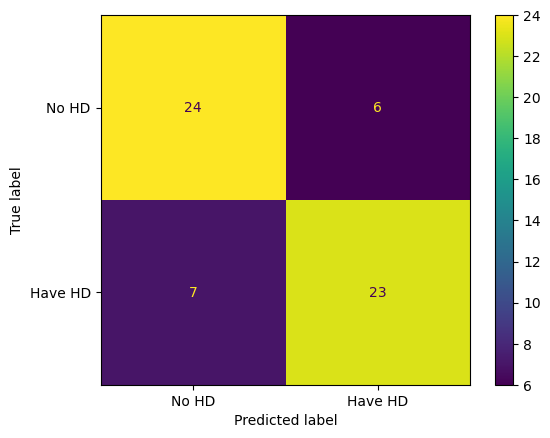

In [335]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clt_tr_prunned,x_test,y_test, display_labels = ["No HD","Have HD"])

[Text(0.5, 0.875, 'thal_7.0 <= 0.5\ngini = 0.495\nsamples = 237\nvalue = [130, 107]\nclass = No HD'),
 Text(0.25, 0.625, 'ca <= 0.5\ngini = 0.388\nsamples = 148\nvalue = [109, 39]\nclass = No HD'),
 Text(0.125, 0.375, 'gini = 0.211\nsamples = 100\nvalue = [88, 12]\nclass = No HD'),
 Text(0.375, 0.375, 'sex <= 0.5\ngini = 0.492\nsamples = 48\nvalue = [21, 27]\nclass = Yes HD'),
 Text(0.25, 0.125, 'gini = 0.32\nsamples = 20\nvalue = [16, 4]\nclass = No HD'),
 Text(0.5, 0.125, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]\nclass = Yes HD'),
 Text(0.75, 0.625, 'cp_4.0 <= 0.5\ngini = 0.361\nsamples = 89\nvalue = [21, 68]\nclass = Yes HD'),
 Text(0.625, 0.375, 'gini = 0.5\nsamples = 33\nvalue = [17, 16]\nclass = No HD'),
 Text(0.875, 0.375, 'gini = 0.133\nsamples = 56\nvalue = [4, 52]\nclass = Yes HD')]

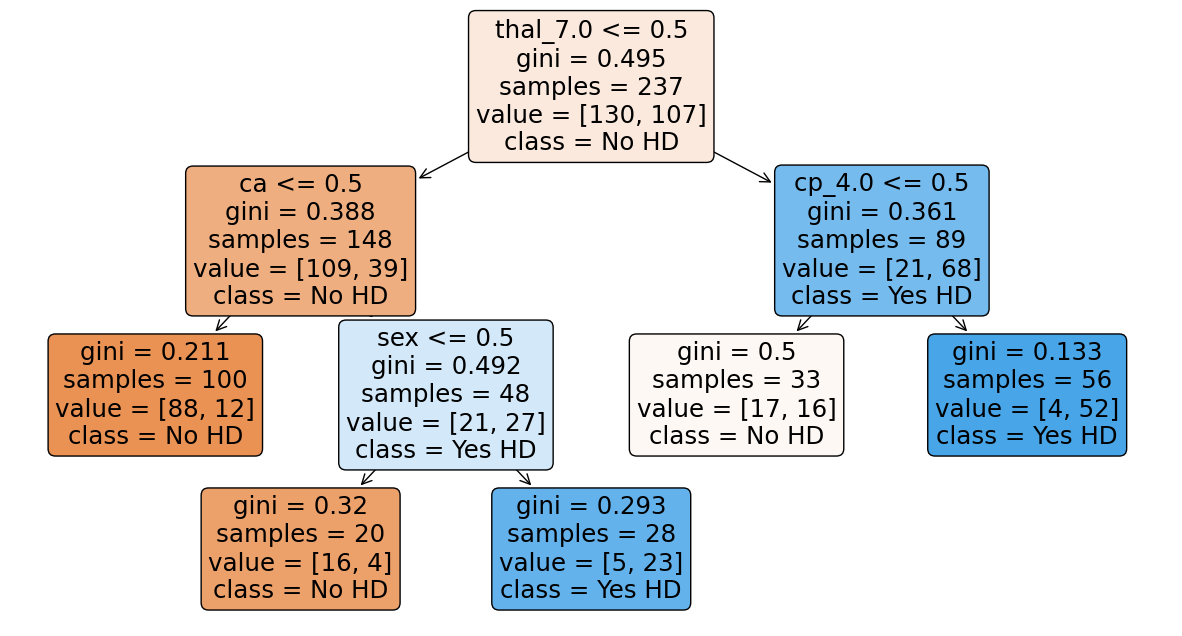

In [337]:
plt.figure(figsize= (15,8))

tree.plot_tree(clt_tr_prunned, filled = True, rounded = True, feature_names = x_train.columns , class_names = ["No HD", "Yes HD"])